<a href="https://colab.research.google.com/github/remijul/tutorial/blob/master/Preprocessing_Exo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing for Machine Learning
---

Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

Please visit this great ressource : [Module Preprocessing from scikit-learn.org](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)

## Objectives
- Understand the usefulness of **handling with missing values** and be able to apply it
- Understand the usefulness of data **encoding** and be able to apply it
- Understand the usefulness of data **scaling** and be able to apply it
- Practice on a dedicated exercice

## Exercices

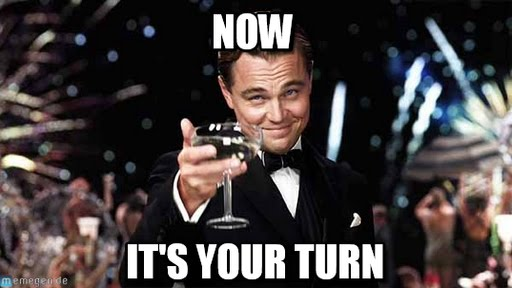


The goal of this exercice is to :
- Use the following ML script that provides a process to predict the genre of a song [spotify playlist].
- Apply full preprocessing on all data (numerical & categorical) to reach the best accuracy score.

**Let's compete to the ML challenge!** 💪


In [2]:
# Load data
import pandas as pd
url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip"
df_music = pd.read_csv(url)
df_music.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


Target preprocessing

In [3]:
# target
from sklearn.preprocessing import LabelEncoder
lb_encod = LabelEncoder()

y = lb_encod.fit_transform(df_music['genre'])
y

array([15, 15, 15, ..., 24, 24, 24])

Features preprocessing

In [4]:
# categorical data
from sklearn.preprocessing import OneHotEncoder
ohe_encod = OneHotEncoder(sparse = False)

X_cat = df_music[['key', 'mode', 'time_signature']]
X_cat = ohe_encod.fit_transform(X_cat)

In [5]:
# numerical  data
from sklearn.preprocessing import RobustScaler, MinMaxScaler
scaler = RobustScaler()
mm_scaler = MinMaxScaler()

X_num = df_music[['duration_ms', 'tempo', 'loudness']]
X_num = scaler.fit_transform(X_num)

X_pop = df_music[['popularity']]
X_pop = mm_scaler.fit_transform(X_pop)

In [6]:
X = pd.concat([pd.DataFrame(X_cat), pd.DataFrame(X_num), df_music[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 	'valence']]], axis=1)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,0,1,2,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.460048,1.110554,0.946411,0.61100,0.389,0.910,0.000000,0.3460,0.0525,0.814
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.001725,1.263152,0.351356,0.24600,0.590,0.737,0.000000,0.1510,0.0868,0.816
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.604986,-0.353401,-0.975598,0.95200,0.663,0.131,0.000000,0.1030,0.0362,0.368
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.820157,1.214448,-0.704306,0.70300,0.240,0.326,0.000000,0.0985,0.0395,0.227
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.662047,0.537976,-2.135247,0.95000,0.331,0.225,0.123000,0.2020,0.0456,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.276224,-0.005120,-0.456778,0.00384,0.687,0.714,0.544000,0.0845,0.0316,0.962
232721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.748031,-0.042261,0.130463,0.03290,0.785,0.683,0.000880,0.2370,0.0337,0.969
232722,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.644872,-0.686474,-0.082935,0.90100,0.517,0.419,0.000000,0.0945,0.1480,0.813
232723,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.024303,-0.341621,0.099681,0.26200,0.745,0.704,0.000000,0.3330,0.1460,0.489


Train test split & Fit the model & Evaluate the model
Model : KNN Classifier

In [7]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

# Fit and predict : KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_prediction = knn_model.predict(X_test)

# Score of models
from sklearn.metrics import accuracy_score
knn_score = accuracy_score(y_test, knn_prediction)
print("KNN :", round(knn_score, 5))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


KNN : 0.21998


Model : GradientBoosting Classifier

In [8]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

# Fit and predict : GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_prediction = gb_model.predict(X_test)

# Score of models
from sklearn.metrics import accuracy_score
gb_score = accuracy_score(y_test, gb_prediction)
print("GB :", round(gb_score, 5))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


GB : 0.34098


## Conclusions
Standardization is always good in preprocessing, before machine learning classifications and regressions. At worst, it does not change anything. At best, it improves results.